# Build a linear regression model on whoop data to predict next day's recovery based on previous day metrics

### target performance / metric: make recovery score predictions within 10% (lower or higher) than ground truth recovery score

165 days of data  
8 features  
1 target variable: recovery score  


In [36]:
#import statements
import pandas as pd
import numpy as np

## load dataset

In [37]:
#load data
df = pd.read_csv("../data/feature_table.csv")
#remove date for training purposes, useful to investigate later when doing error analysis
del df["Date"]
df.head()

,Day Strain,Resting heart rate (bpm),Heart rate variability (ms),Average HR (bpm),Respiratory rate (rpm),Asleep duration (min),Deep (SWS) duration (min),REM duration (min),Recovery score %
0,-1.260880,0.535925,-0.628835,1.148218,-1.692366,-2.215184,-0.598923,-0.746988,34.0
1,0.362915,-0.492303,0.248181,-1.895251,-1.166490,-1.644456,0.071708,-0.648916,57.0
2,-1.745170,1.906897,2.137139,-0.373517,0.411140,0.546404,-0.886336,-0.477288,84.0
3,-1.232392,0.878668,0.113256,1.401840,-0.640613,0.693689,-0.455216,0.111149,59.0
4,-0.064399,0.878668,-0.831223,0.133728,-1.955305,1.466933,-0.598923,1.435133,35.0


## create train/test set

opting for only 0.2 test size due to low number of training examples (165)

In [38]:
#define input features X and target variable y
features = [f for f in df.columns.to_list() if f != "Recovery score %"] #create list of feature names
X, y = df[features], df["Recovery score %"] #define features X and target variable y
print(X.shape, y.shape)

(164, 8) (164,)


In [39]:
#create train/test sets
from sklearn.model_selection import train_test_split

#X_train are the features of the training set, y_train are the target variables/outcomes for those features, same thing for test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(131, 8) (33, 8) (131,) (33,)


## train linear regression model

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression() #create linear regression model instance
lin_reg.fit(X_train, y_train)

LinearRegression()

### What Happens Inside `lin_reg.fit(X_train, y_train)`

When you call `lin_reg.fit(X_train, y_train)`, scikit-learn’s `LinearRegression` does the following:

---

#### 1. Understands Your Data
- It checks that `X_train` (your features) is a table with rows and columns.
- It checks that `y_train` (your target) is a single column of values.
- It prepares the data so that it can find the best line (or plane) to fit.

---

#### 2. Defines the Goal (Cost Function)
- The goal is to find coefficients (weights) that minimize prediction errors.
- The error is measured using **Mean Squared Error (MSE)**:
  \[
  MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2
  \]
  where \(\hat{y}_i\) is the prediction for row \(i\).

---

#### 3. Finds the Best Coefficients
- Instead of guessing coefficients and adjusting them (like gradient descent), it uses a **mathematical shortcut (least squares)** to directly calculate the best values.
- Under the hood, it uses a method called **SVD (Singular Value Decomposition)** — a stable way to find the exact solution.

---

#### 4. Saves the Model Parameters
- The numbers it finds (coefficients and intercept) are saved in:
  ```python
  lin_reg.coef_      # effect of each feature
  lin_reg.intercept_ # baseline prediction


## Investigate linear regression model

In [44]:
#a linear regression model estimates weights and y intercept w, b
print(lin_reg.intercept_) #scalar value
print(lin_reg.coef_) #weight for each feature, so (8,) 1D array because I have 8 featuress

61.12690821531373
[ 1.06193172 -3.76922181  9.42248154 -0.11948836  3.26521197  1.76583036
 -1.29228885  2.75872364]


In [58]:
#the magnitude of the features indicates how significantly they affect the target variable y
coeffs = {}
for feature, coef in zip(X_train.columns, lin_reg.coef_):
    coeffs[feature] = coef
sorted_coeffs = dict(sorted(coeffs.items(), key=lambda item: item[1], reverse=True)) # sort dict by descending values
sorted_coeffs

{'Heart rate variability (ms)': np.float64(9.422481538022906),
 'Respiratory rate (rpm)': np.float64(3.265211970282474),
 'REM duration (min)': np.float64(2.7587236396896504),
 'Asleep duration (min)': np.float64(1.7658303638145405),
 'Day Strain': np.float64(1.0619317196280087),
 'Average HR (bpm)': np.float64(-0.11948836486105165),
 'Deep (SWS) duration (min)': np.float64(-1.2922888470207625),
 'Resting heart rate (bpm)': np.float64(-3.769221812525627)}

## Evaluate coefficients

<BarContainer object of 8 artists>

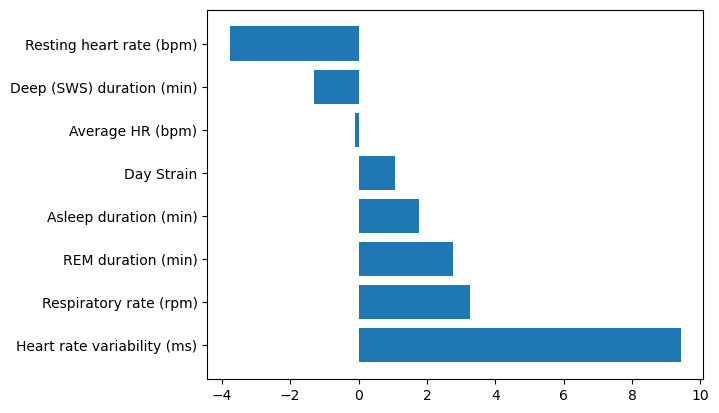

In [60]:
import matplotlib.pyplot as plt
#bar plot of coefficients
features = [item[0] for item in sorted_coeffs.items()]
values = [item[1] for item in sorted_coeffs.items()]

plt.barh(features, values)


## Heart rate variability is the most impactful feature on recovery score (9.422)
respiratory rate is next (3.25) and REM duration (2.75)

## Make predictions on test set and compute MSE mean squared error

In [62]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_test) # make preidcition on test set inputs
mse = mean_squared_error(y_test, y_pred) #calculate mean squared error on test set predicitons -> how far were predictions from ground truth number
rmse = mse ** 0.5  # Square root of MSE

print("mse: " + str(mse))
print("rmse: " + str(rmse))

mse: 113.65271576275359
rmse: 10.66080277290381


## Plot predictions vs actual values

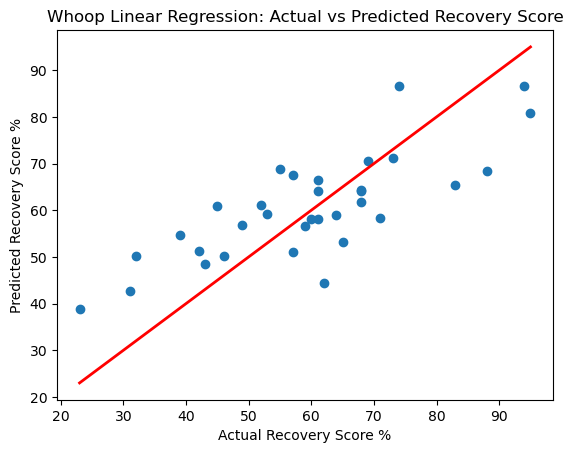

In [64]:
#create scatter plot
plt.scatter(y_test, y_pred)

plt.xlabel("Actual Recovery Score %")
plt.ylabel("Predicted Recovery Score %")

plt.title("Whoop Linear Regression: Actual vs Predicted Recovery Score")

#add perfect prediction line
plt.plot([y_test.min(), y_test.max()],
         [y_test.min(), y_test.max()],
         color="red", linewidth=2)  # Perfect prediction line
plt.show()

## plot model accuracy via one selected feature just to visualize: (can't do all 8 at once and visualize)
so opting for HR variability due to strongest correlation



# by scratch lin reg model wihtout sci-kit learn